In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
x = [7.2,8.1,10.9,9.9,14.6,10.6,20.6,17.2,2.1,2.4,9,5.3,4.6,2.5,23.2,23.8,17.4,0.2,23.3,12.2,10.8,14.4,3.4,7.2,22.2,10.8,13.1,11.1,13,0.7,8.4,17.8,19,6.4,5.6,1.4,18.2,18.7,21.4,14.6,8.8,2.6,2.8,16.2,24.4,2.3,17.2,24.5,19.8,16.3,1.3,0.6,12.4,20.5,12.7,18.5,22.6,16.7,20.2,3.7,7.6,12.7,16.1,15.2,2.2,17.1,15.8,25,15.2,1.5,20.2,14.6,13.9,13.3,9.2,6.1,13,13.7,20.6,0.5,6.4,23.4,3.4,24.3,13.4,3.3,16.3,6.2,19.6,18.5,0.3,8.7,18.8,11,13.6,24.5,23.4,8.6,23.6,13.6]
y = [277.6,280.6,291,288.4,303.9,289.5,322.9,310.9,263.7,262.7,286.1,272.3,270.2,262.8,330.6,335.6,312.1,255.5,329.9,297.4,288.1,303.9,266.1,278.2,326.2,288.5,297.9,290.8,298.7,258.2,283.7,312.6,314.8,277.8,274.1,259.8,317.2,316.7,326.7,302.1,286,264.2,264.3,307.2,336.4,262.5,309.7,334.1,322.8,310.8,260,258,293.7,321.3,298.1,313.8,327,305.9,319.9,269.4,280.5,297,307.7,304.9,263.1,311.7,305.2,338.9,303.8,260.4,318.1,302.4,302.2,298.2,287.6,275.1,299.6,298.5,322.7,258,277,330.8,266.2,333.6,299.6,266.7,306.8,275,316.7,315,256.8,282.1,319.8,291.8,298.1,335.4,333.1,282.7,328.3,299.1]

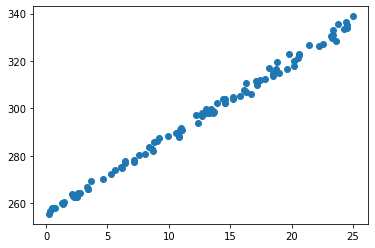

In [10]:
plt.scatter(x,y,label="input data set")

In [11]:
## 선형 모델(선형 그래프) 모델링
class LinearModel:
    def __call__(self,x):
        return self.Weight * x +self.Bias
    def __init__(self):
        self.Weight = tf.Variable(0.)
        self.Bias=tf.Variable(0.)

In [12]:
#오차(손실) 구하기 함수
def loss(y,pred): ## pred 현재 관계식(선형 식)으로 예상된 값 
    return tf.reduce_mean(tf.square(y-pred)) #실제 y와 값 차이

In [15]:
#학습 함수
def train(linear_model,x,y,lr): ## lr : 선형식을 얼마 만큼 움직여 볼지 지정하는 변수
    with tf.GradientTape() as t:
        current_loss = loss(y,linear_model(x))
    lr_weight,lr_bias =t.gradient(current_loss,[linear_model.Weight,linear_model.Bias])
    linear_model.Weight.assign_sub(lr*lr_weight)
    linear_model.Bias.assign_sub(lr*lr_bias)

In [17]:
#학습 진행
linear_model = LinearModel()
epochs =  10000

for epoch_count in range(epochs+1):
    real_loss = loss(y,linear_model(x))
    train(linear_model,x,y,0.003)
    if epoch_count%100==0:
       print(f"{epoch_count}:: W:{linear_model.Weight.numpy()} b:{linear_model.Bias.numpy()} Loss:{real_loss.numpy()}") 

0:: W:23.460250854492188 b:1.7784658670425415 Loss:88410.46875
100:: W:16.296913146972656 b:36.56782150268555 Loss:11955.6220703125
200:: W:14.492939949035645 b:66.81465148925781 Loss:8882.7373046875
300:: W:12.938032150268555 b:92.88546752929688 Loss:6599.78955078125
400:: W:11.59780216217041 b:115.35681915283203 Loss:4903.71435546875
500:: W:10.442611694335938 b:134.7256622314453 Loss:3643.64501953125
600:: W:9.446911811828613 b:151.42034912109375 Loss:2707.498046875
700:: W:8.588679313659668 b:165.81016540527344 Loss:2012.0009765625
800:: W:7.848939895629883 b:178.2132110595703 Loss:1495.2950439453125
900:: W:7.211330413818359 b:188.90386962890625 Loss:1111.4161376953125
1000:: W:6.661754608154297 b:198.11849975585938 Loss:826.221435546875
1100:: W:6.188058376312256 b:206.0608673095703 Loss:614.341796875
1200:: W:5.779763698577881 b:212.9066619873047 Loss:456.9297180175781
1300:: W:5.427835941314697 b:218.80735778808594 Loss:339.98162841796875
1400:: W:5.124497890472412 b:223.893356

In [19]:
# 결과 출력
print(f"y={linear_model.Weight.numpy()}x+{linear_model.Bias.numpy()}")

y=3.231062889099121x+255.6401824951172


In [21]:
#예상값 출력
input_value=input()
output_value=float(input_value)*linear_model.Weight.numpy() + linear_model.Bias.numpy()
print(output_value)

5
271.7954969406128
